In [221]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import time

import random
random.seed(67)

import numpy as np
np.random.seed(67)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('notebook', font_scale=2)

# Import Data

In [222]:
df_train = pd.read_csv('/data/train_data.csv')
df_valid = pd.read_csv('/data/valid_data.csv')
df_test = pd.read_csv('/data/test_data.csv')

In [223]:
feature_cols = list(df_train.columns[:-1])
target_col = df_train.columns[-1]

In [224]:
df_train[target_col] = df_train[target_col].astype(np.int32)
df_valid[target_col] = df_valid[target_col].astype(np.int32)

# Visualization

In [225]:
df_plot = pd.melt(df_valid, 'target', var_name='feature')

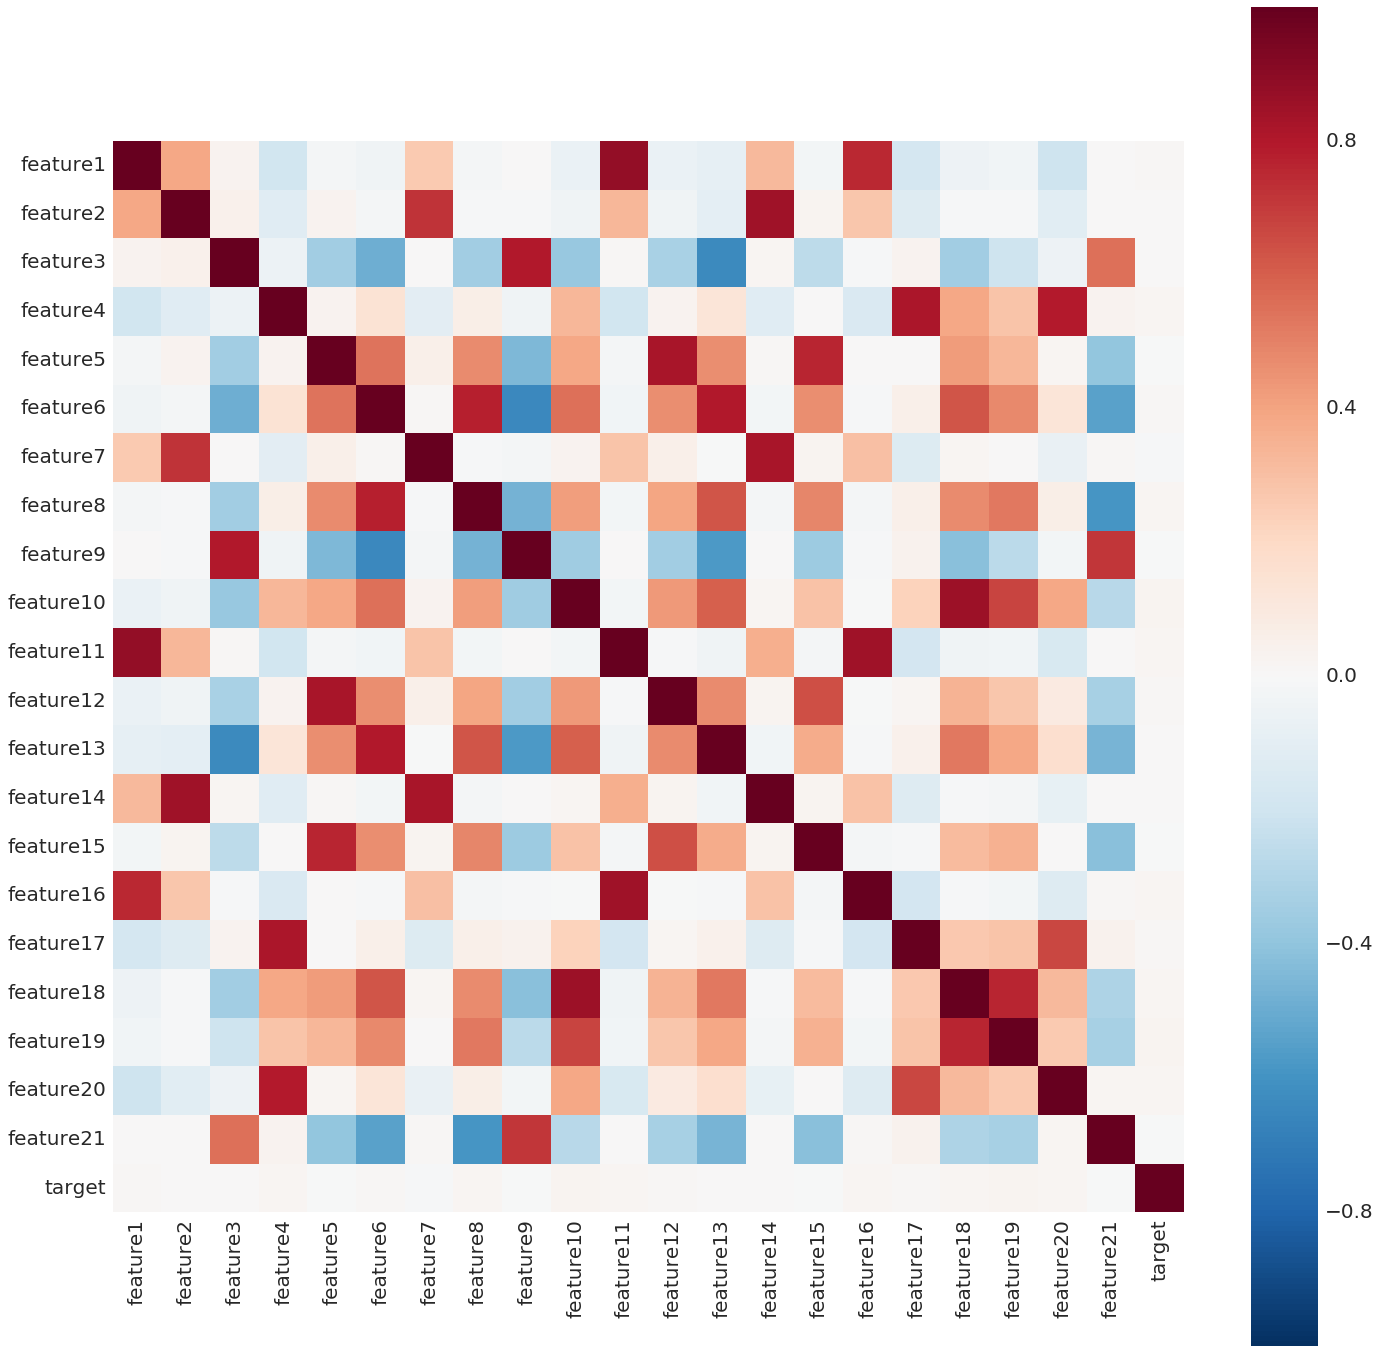

In [132]:
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(df_valid.corr(), square=True)

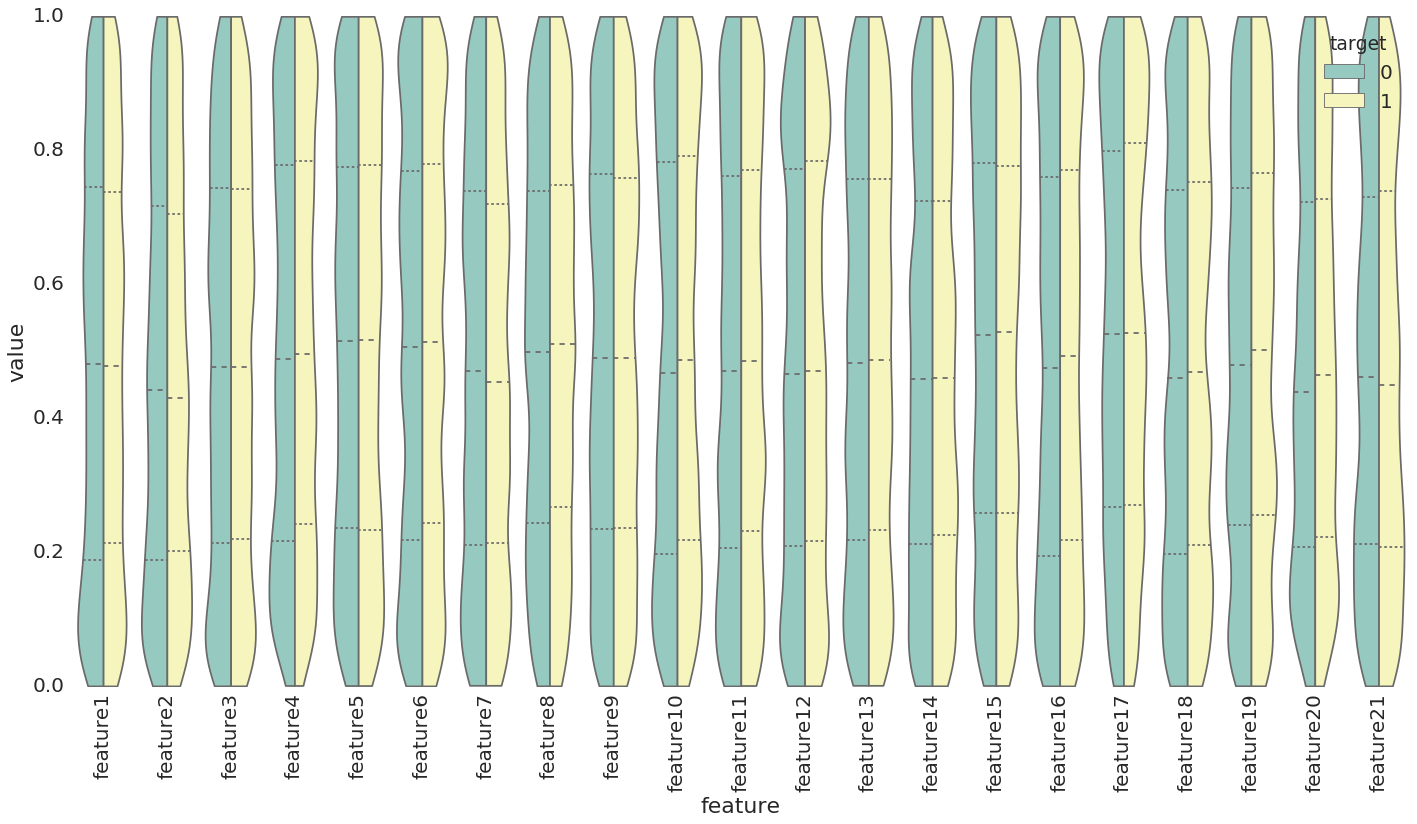

In [133]:
fig, ax = plt.subplots(figsize=(24, 12))

sns.violinplot(data=df_plot, x='feature', y='value', split=True, hue='target', scale='area', palette='Set3', cut=0, lw=1, inner='quart')
sns.despine(left=True, bottom=True)

ax.set_xticklabels(feature_cols, rotation=90);

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa29a6f3110>


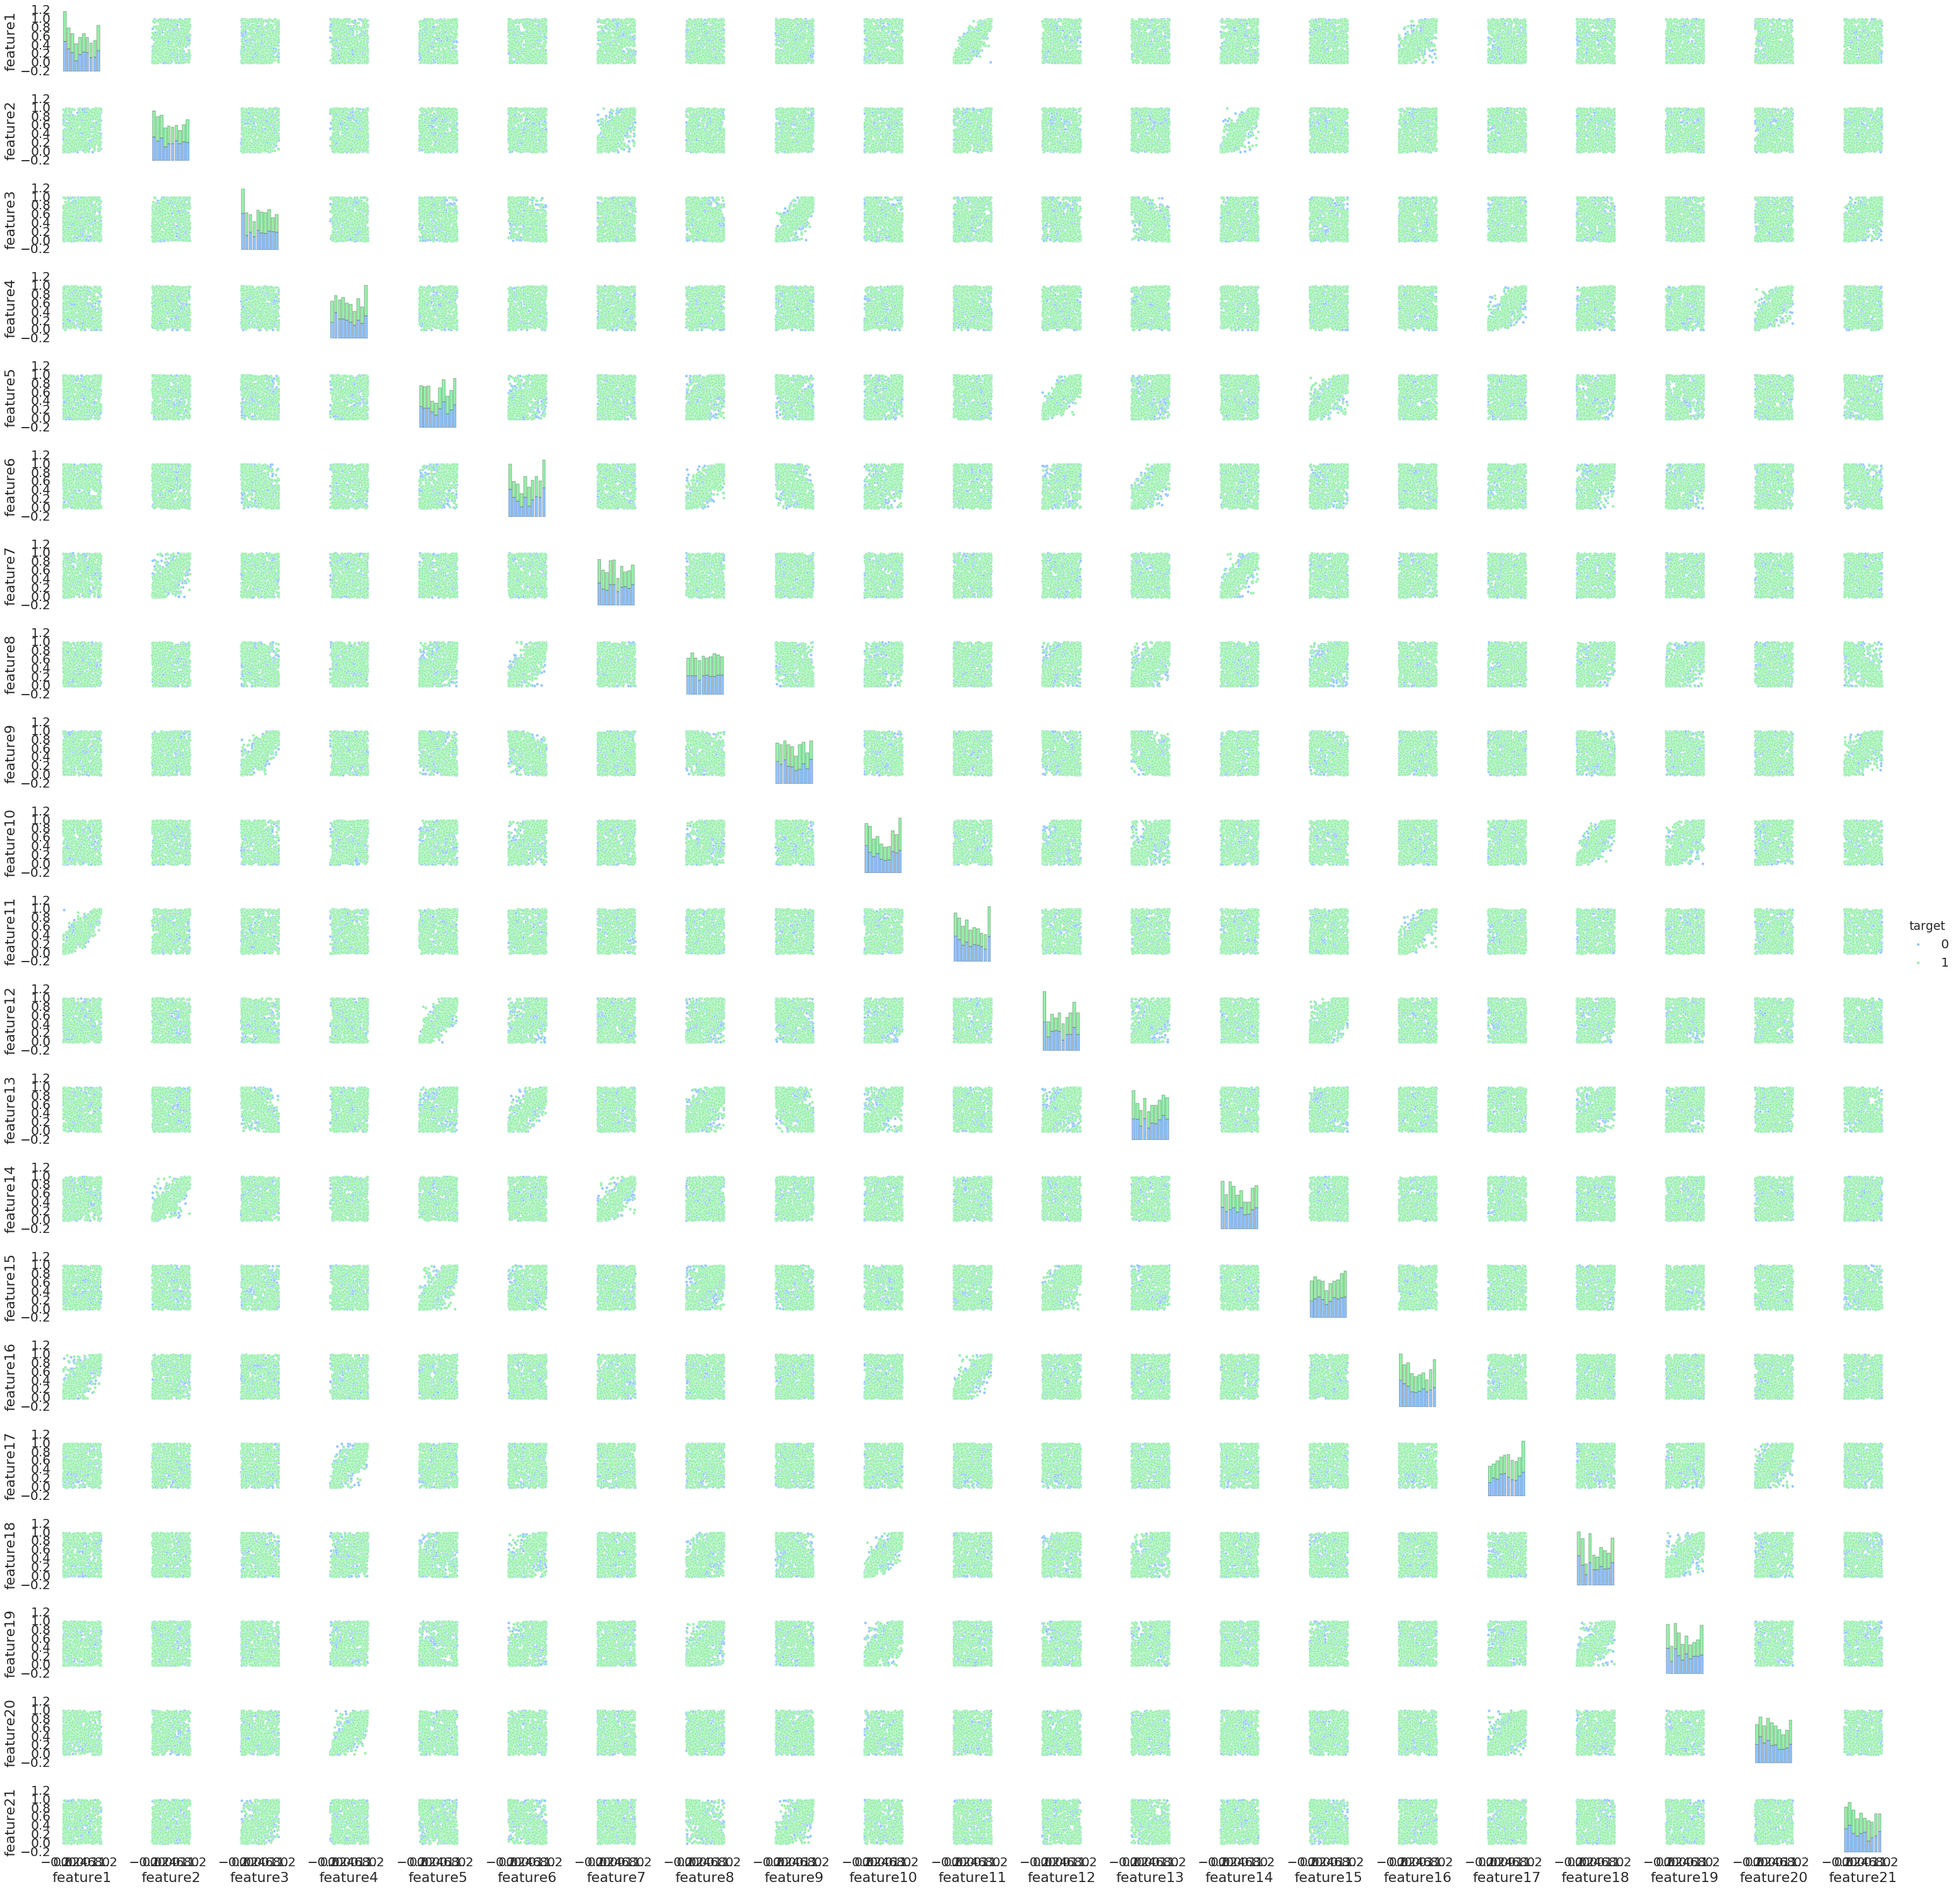

In [135]:
p = sns.pairplot(df_valid.sample(n=1000), hue='target', vars=feature_cols, size=2)
sns.despine(left=True, bottom=True)

In [219]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_union, make_pipeline

pipeline = make_pipeline(
    PolynomialFeatures(degree=2),
    PCA(n_components=2),
)

pipeline.fit(df_train[feature_cols].values, df_train[target_col].values)

X_pipeline0 = pipeline.transform(df_valid[df_valid[target_col] == 0][feature_cols].values)
X_pipeline1 = pipeline.transform(df_valid[df_valid[target_col] == 1][feature_cols].values)

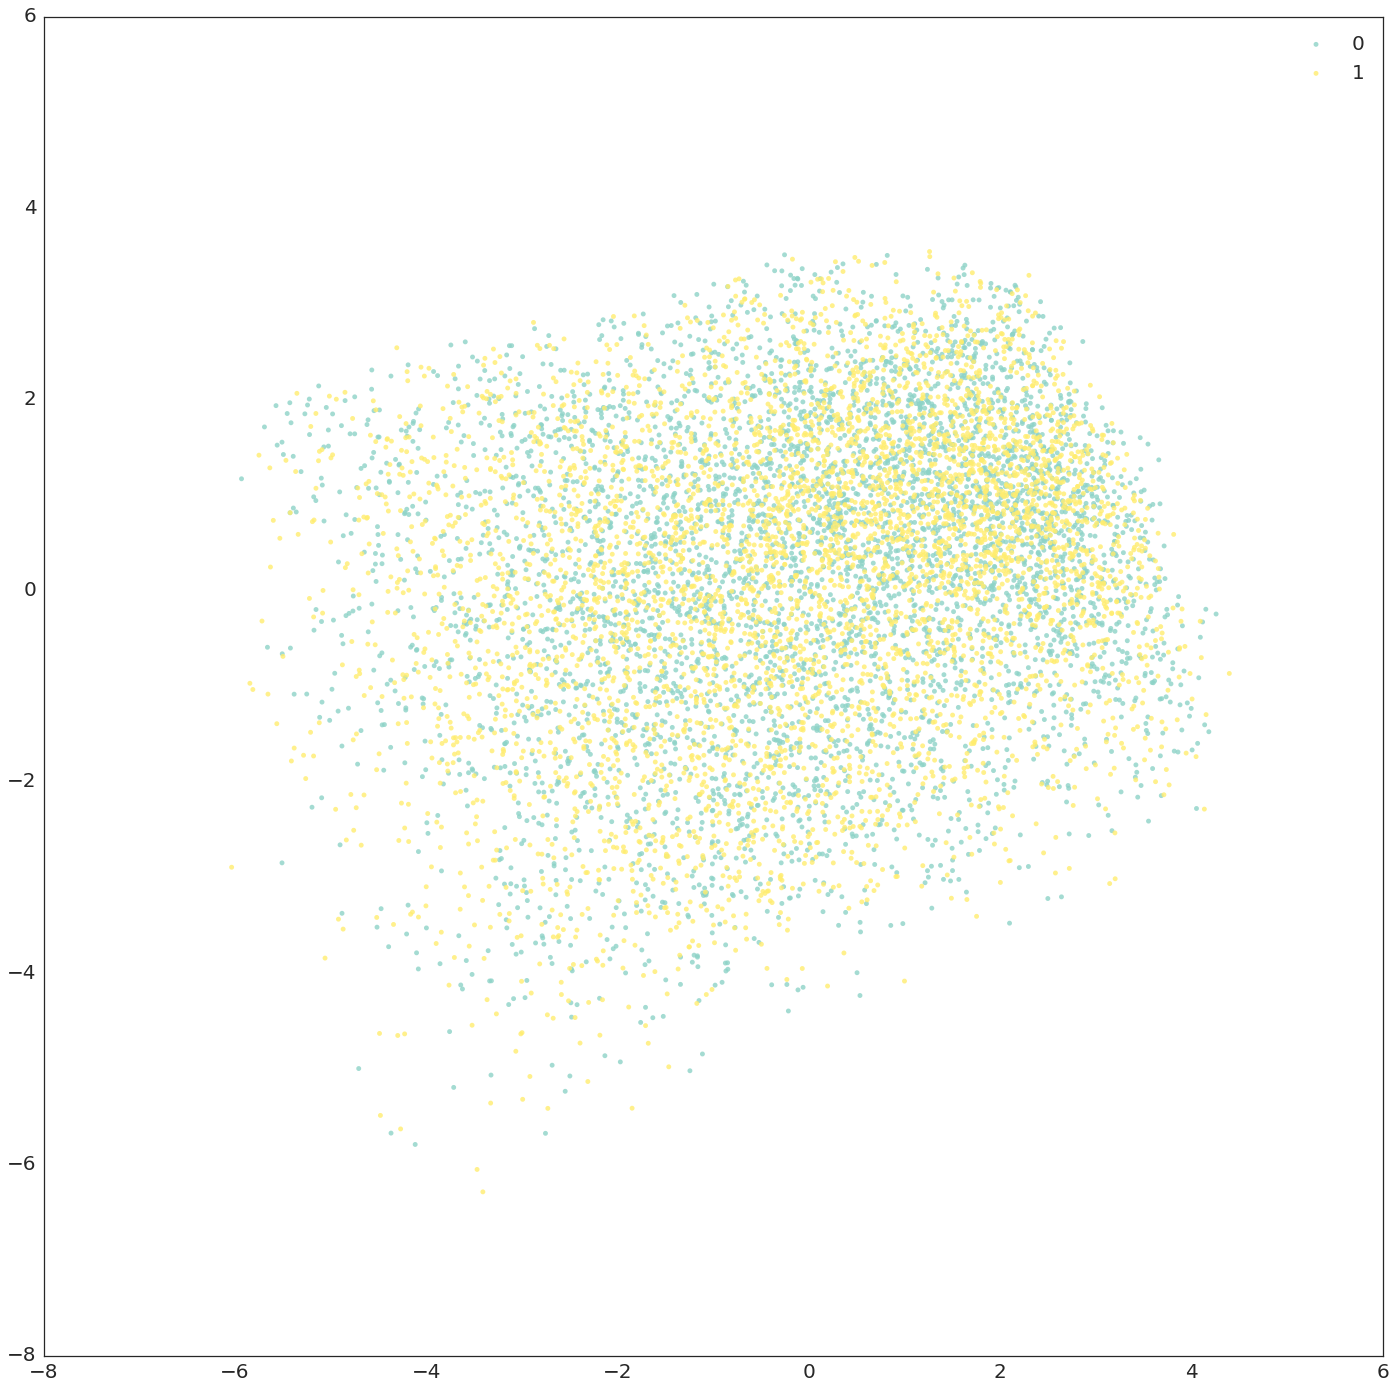

In [220]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(24, 24))
ax.scatter(X_pipeline0[:,0], X_pipeline0[:,1], c=cm.Set3(np.zeros_like(X_pipeline0[:,0])), s=24, lw=0, alpha=0.8, marker='o', label='0')
ax.scatter(X_pipeline1[:,0], X_pipeline1[:,1], c=cm.Set3(np.ones_like(X_pipeline0[:,0])), s=24, lw=0, alpha=0.8, marker='o', label='1')
ax.legend()

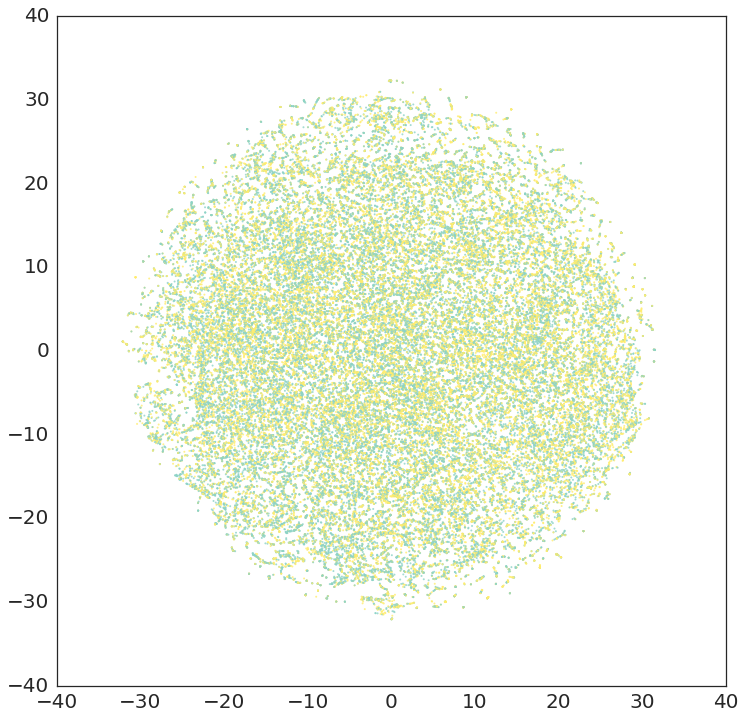

In [208]:
tsne_data = np.load('/data/tsne_2d_5p.npz')

fig, ax = plt.subplots(figsize=(25, 25))
plt.scatter(tsne_data['train'][:,0], tsne_data['train'][:,1], c=df_train['target'], cmap='Set3', alpha=0.8, s=4, lw=0)

In [250]:
from sklearn.manifold import Isomap
from sklearn.pipeline import make_union, make_pipeline

isomap = Isomap()
isomap.fit(df_train[feature_cols].values[:10000])
isomap_train = isomap.transform(df_train[feature_cols].values)
isomap_valid = isomap.transform(df_valid[feature_cols].values)

In [294]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=30)
dbscan_train = dbscan.fit_predict(isomap_train)
np.unique(dbscan_train)

array([-1,  0,  1])

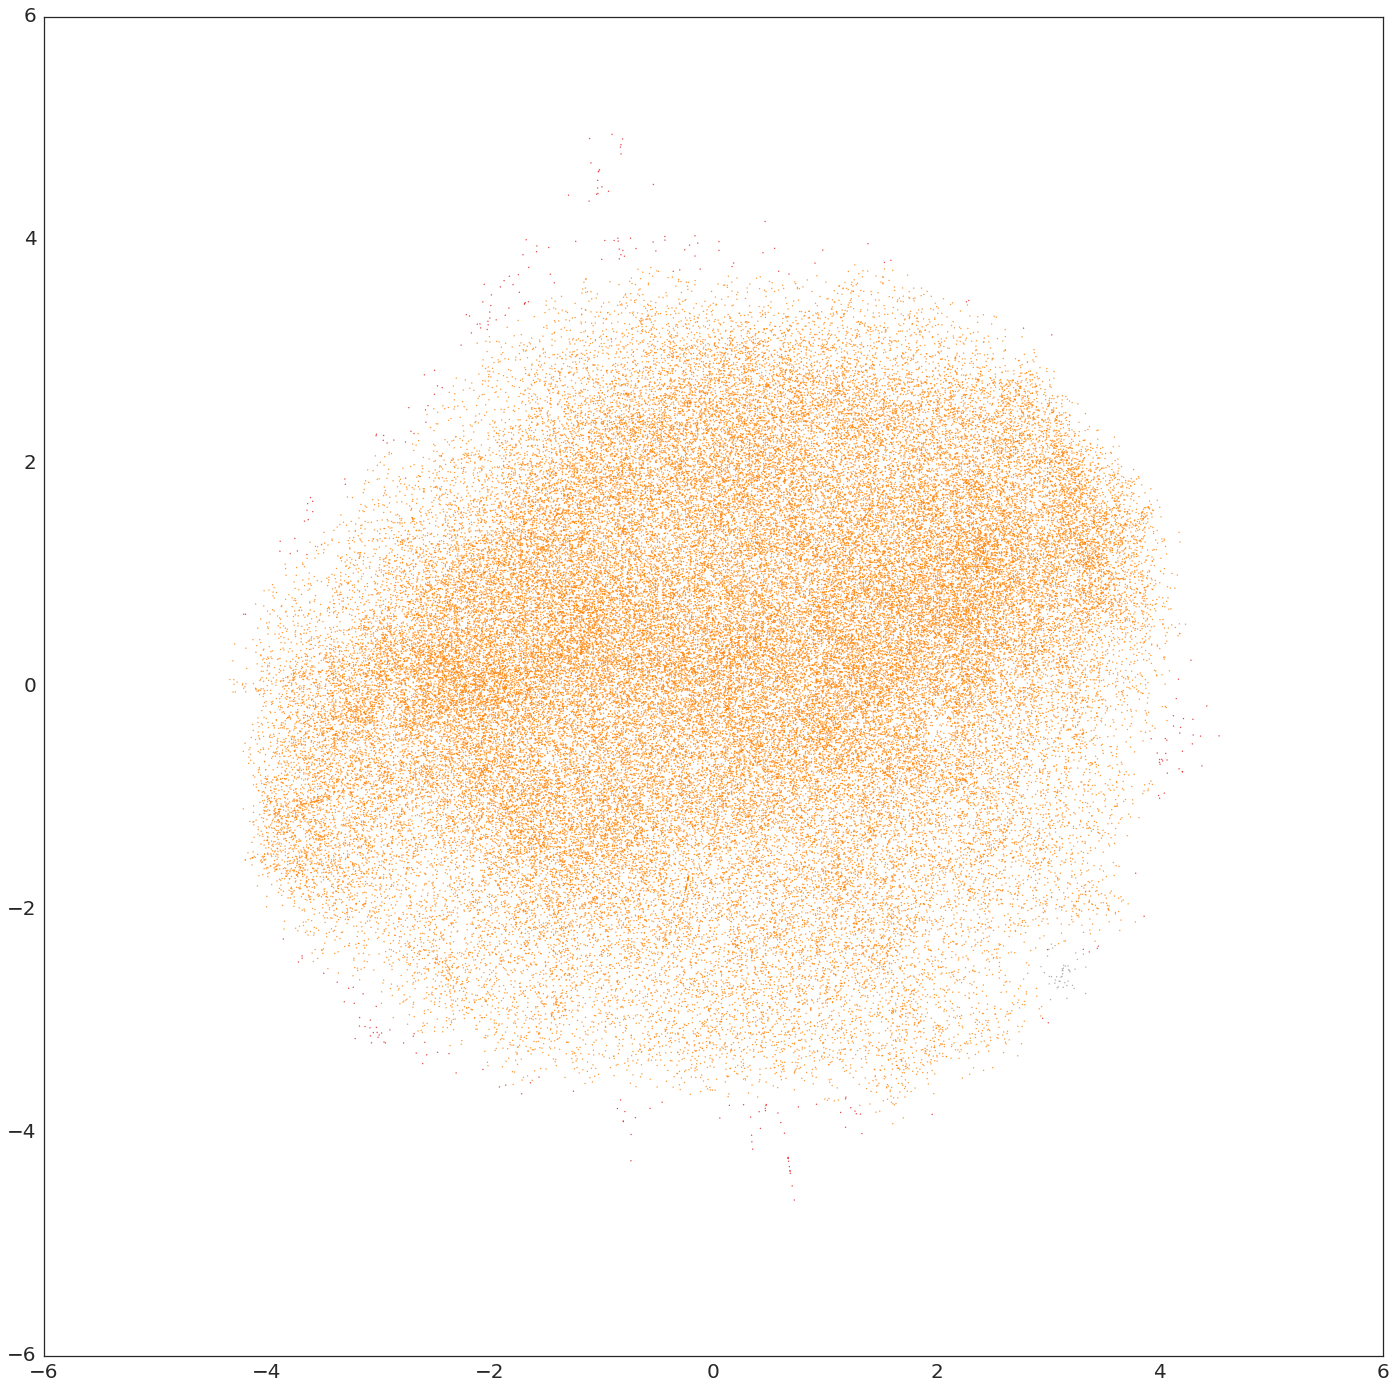

In [296]:
fig, ax = plt.subplots(figsize=(24, 24))
plt.scatter(isomap_train[:,0], isomap_train[:,1], c=dbscan_train, cmap='Set1', alpha=0.8, s=8, marker='.', lw=0)